# **LLM - Detect AI Generated Text**

The goal of the project is to work with the data by training the model to detect wheter the essay was written by
* Student (0) - Human Generated Text
* Generated by an LLM (1) - AI Generated Text

## **Import Libraries**

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import joblib

## **Load dataset**

In [3]:
file_path = "/content/drive/MyDrive/dataset/train_essays_7_prompts.csv"
data = pd.read_csv(file_path, dtype=str)
df = data.copy()
df.head()

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [4]:
df.tail()

,text,label
14872,Cars are one of the most important and common ...,1
14873,"In today's world, cell phones are ubiquitous a...",1
14874,"In ""The Challenge of Exploring Venus,"" the aut...",1
14875,"The article ""Making Mona Lisa Smile"" discusses...",1
14876,Passage 1:\n\nCars are one of the main ways in...,1


The essay was written by a student (0), generated by an LLM (1)

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
df.shape

(14877, 2)

In [7]:
df['label'].value_counts()

0    13712
1     1165
Name: label, dtype: int64

Define label column in the data for analysis

In [8]:
human_generated_text = df[df['label'] == "0"]
ai_generated_text = df[df['label'] == "1"]

In [9]:
human_generated_text.shape, ai_generated_text.shape

((13712, 2), (1165, 2))

## **Balance dataset**

Under-sampling the data to balance with ai_generated_text --> 1165

In [10]:
human_generated_text_sample = human_generated_text.sample(n=1165)

Concatenating the dataframe

In [11]:
new_df = pd.concat([human_generated_text_sample, ai_generated_text], axis=0)

In [139]:
new_df

,text,label
3854,The advantages of limiting car usage is that i...,0
3523,Fellow citizens there have been an abudnce of ...,0
3637,As a teen you wanted to drive. You wanted tha...,0
2314,Cell phones have become very popular over the ...,0
12641,"Dear Senator,\n\nI text you because I want cha...",0
...,...,...
14872,Cars are one of the most important and common ...,1
14873,"In today's world, cell phones are ubiquitous a...",1
14874,"In ""The Challenge of Exploring Venus,"" the aut...",1
14875,"The article ""Making Mona Lisa Smile"" discusses...",1


In [13]:
new_df['label'].value_counts()

0    1165
1    1165
Name: label, dtype: int64

## **Train Test Split**

Splitting the data to feature Input and Target

In [14]:
input = new_df['text']
target = new_df['label']

In [15]:
input, target

(3854     The advantages of limiting car usage is that i...
 3523     Fellow citizens there have been an abudnce of ...
 3637     As a teen you wanted to drive.  You wanted tha...
 2314     Cell phones have become very popular over the ...
 12641    Dear Senator,\n\nI text you because I want cha...
                                ...                        
 14872    Cars are one of the most important and common ...
 14873    In today's world, cell phones are ubiquitous a...
 14874    In "The Challenge of Exploring Venus," the aut...
 14875    The article "Making Mona Lisa Smile" discusses...
 14876    Passage 1:\n\nCars are one of the main ways in...
 Name: text, Length: 2330, dtype: object,
 3854     0
 3523     0
 3637     0
 2314     0
 12641    0
         ..
 14872    1
 14873    1
 14874    1
 14875    1
 14876    1
 Name: label, Length: 2330, dtype: object)

Split the data into Training data and Testing data

In [104]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, stratify=target, random_state=2)

In [17]:
print(input.shape, x_train.shape, x_test.shape)
print(target.shape, y_train.shape, y_test.shape)

(2330,) (1864,) (466,)
(2330,) (1864,) (466,)


In [140]:
x_test[:1], y_test[:1]

(1999    Dear Senator,\n\nI am writing to express my op...
 Name: text, dtype: object,
 1999    1
 Name: label, dtype: object)

In [18]:
y_train.value_counts()

0    932
1    932
Name: label, dtype: int64

In [19]:
y_test.value_counts()

1    233
0    233
Name: label, dtype: int64

## **Tokenize datasest**

In [20]:
vectorizer = CountVectorizer()

In [21]:
x_train_tk = vectorizer.fit_transform(x_train)
x_test_tk = vectorizer.transform(x_test)

In [22]:
# check what inside x_train_tk
x_train_tk.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
x_train_tk.shape

(1864, 14806)

In [24]:
x_test_tk.shape

(466, 14806)

## **Model Training & Evaluation**

### **LogisticRegression**

In [86]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit(x_train_tk, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# Accuracy on test data
y_test_pred = log_reg.predict(x_test_tk)
test_data_accuracy = accuracy_score(y_test_pred, y_test)

In [28]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9871244635193133


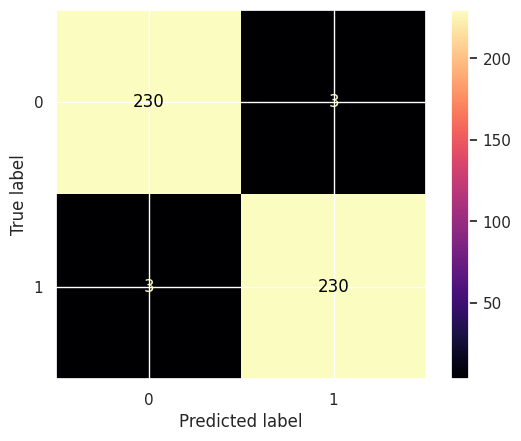

In [29]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = log_reg.classes_,
    cmap = 'magma'
)

#### Save and load the model

In [120]:
# save the model to disk
filename = "log_reg_trained_model.sav"
joblib.dump(log_reg, filename)

['log_reg_trained_model.sav']

In [122]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9871244635193133


### **MultinomialNB**

In [85]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [30]:
clf = MultinomialNB()

In [31]:
clf.fit(x_train_tk, y_train)

MultinomialNB()

In [32]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

In [33]:
# Accuracy on test data
y_test_pred_clf = clf.predict(x_test_tk)
test_data_accuracy_clf = accuracy_score(y_test_pred_clf, y_test)

In [34]:
print('Accuracy on Test data : ', test_data_accuracy_clf)

Accuracy on Test data :  0.9034334763948498


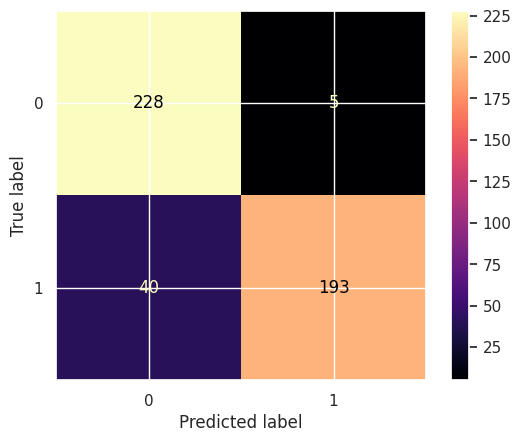

In [35]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_clf,
    labels = clf.classes_,
    cmap = 'magma'
)

In [36]:
print(classification_report(y_test, y_test_pred_clf))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       233
           1       0.97      0.83      0.90       233

    accuracy                           0.90       466
   macro avg       0.91      0.90      0.90       466
weighted avg       0.91      0.90      0.90       466



### **ComplementNB**

In [37]:
cpm = ComplementNB()

In [38]:
cpm.fit(x_train_tk, y_train)

ComplementNB()

In [39]:
cpm.get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn',
 'norm': False}

In [40]:
# Accuracy on test data
y_test_pred_cpm = cpm.predict(x_test_tk)
test_data_accuracy_cpm = accuracy_score(y_test_pred_cpm, y_test)

In [41]:
print('Accuracy on Test data : ', test_data_accuracy_cpm)

Accuracy on Test data :  0.9034334763948498


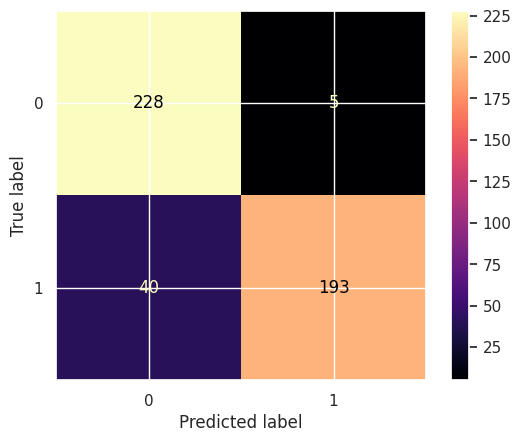

In [42]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_cpm,
    labels = cpm.classes_,
    cmap = 'magma'
)

In [43]:
print(classification_report(y_test, y_test_pred_cpm))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       233
           1       0.97      0.83      0.90       233

    accuracy                           0.90       466
   macro avg       0.91      0.90      0.90       466
weighted avg       0.91      0.90      0.90       466



### **KNeighborsClassifier**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [45]:
parameters_knn = {'n_neighbors':range(1, 21),
                  'weights':['uniform', 'distance']}

In [46]:
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                               param_grid = parameters_knn,
                               scoring = 'accuracy')

In [47]:
grid_search_knn.fit(x_train_tk, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
knn_clf = grid_search_knn.best_estimator_
knn_clf

KNeighborsClassifier(n_neighbors=2)

In [49]:
y_test_pred_knn = knn_clf.predict(x_test_tk)
test_data_accuracy_knn = accuracy_score(y_test_pred_knn, y_test)

In [50]:
print('Accuracy on Test data : ', test_data_accuracy_knn)

Accuracy on Test data :  0.9484978540772532


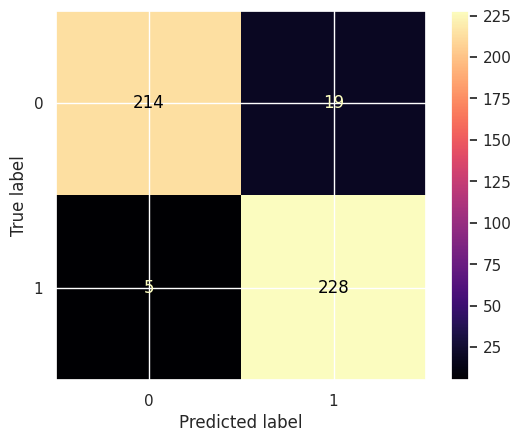

In [51]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_knn,
    labels = knn_clf.classes_,
    cmap = 'magma'
);

In [52]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       233
           1       0.92      0.98      0.95       233

    accuracy                           0.95       466
   macro avg       0.95      0.95      0.95       466
weighted avg       0.95      0.95      0.95       466



### **Support Vector Machines**

In [170]:
from sklearn.preprocessing import  MaxAbsScaler, MinMaxScaler
from sklearn.svm import SVC

In [54]:
# MaxAbsScaler doesn’t reduce the effect of outliers; it only linearly scales them down
# This scaler can also be applied to sparse CSR or CSC matrices

scaling = MaxAbsScaler()

In [55]:
x_train_svc = scaling.fit_transform(x_train_tk)
x_test_svc = scaling.transform(x_test_tk)

In [108]:
x_train_svc.dtype, x_test_svc.dtype

(dtype('float64'), dtype('float64'))

In [56]:
parameters_svc = {'kernel':['linear', 'poly', 'rbf'],
                  'C':range(1, 11),
                  'gamma': ['scale', 'auto']}

In [57]:
grid_search_svc = GridSearchCV(estimator = SVC(),
                               param_grid = parameters_svc,
                               scoring = 'accuracy')

In [58]:
grid_search_svc.fit(x_train_svc, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 11), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [59]:
svc_clf = grid_search_svc.best_estimator_
svc_clf

SVC(C=7)

In [60]:
y_test_pred_svc = svc_clf.predict(x_test_svc)
test_data_accuracy_svc = accuracy_score(y_test_pred_svc, y_test)

In [61]:
print('Accuracy on Test data : ', test_data_accuracy_svc)

Accuracy on Test data :  0.9957081545064378


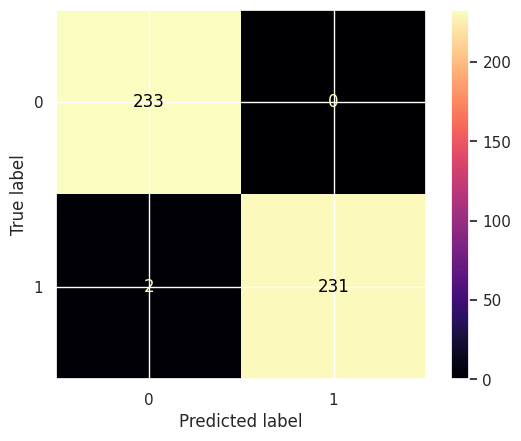

In [62]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_svc,
    labels = svc_clf.classes_,
    cmap = 'magma'
);

In [63]:
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       233
           1       1.00      0.99      1.00       233

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



#### Save and load the model

In [186]:
# save the model to disk
filename = "svc_clf_trained_model.sav"
joblib.dump(svc_clf, filename)

['svc_clf_trained_model.sav']

In [187]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test_svc, y_test)
print(result)

0.9957081545064378


### **RandomForestClassifier**

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(ccp_alpha = 0.0001)

In [65]:
rf_clf.fit(x_train_tk, y_train)

RandomForestClassifier(ccp_alpha=0.0001)

In [109]:
y_test_pred_rf = rf_clf.predict(x_test_tk)
test_data_accuracy_rf = accuracy_score(y_test_pred_rf, y_test)

In [110]:
print('Accuracy on Test data : ', test_data_accuracy_rf)

Accuracy on Test data :  0.9721030042918455


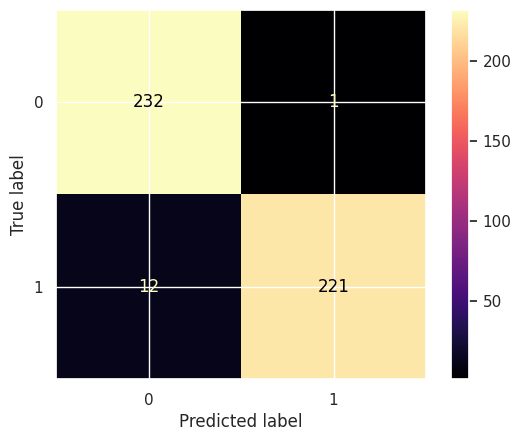

In [111]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_rf,
    labels = rf_clf.classes_,
    cmap = 'magma'
);

In [69]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       233
           1       1.00      0.95      0.97       233

    accuracy                           0.97       466
   macro avg       0.97      0.97      0.97       466
weighted avg       0.97      0.97      0.97       466



#### Save and load the model

In [119]:
print(f"Shape of x_train_tk: {x_train_tk.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train_tk: (1864, 14806)
Shape of y_test: (466,)


In [113]:
# save the model to disk
filename = "rf_clf_trained_model.sav"
joblib.dump(rf_clf, filename)

['rf_clf_trained_model.sav']

In [192]:
# load the model from disk
loaded_model = joblib.load("rf_clf_trained_model.sav")
result = loaded_model.score(x_test_tk, y_test)
print(result)

0.9721030042918455
